<h1> CLASSIFICATION - WINE QUALITY DATASET </h1>

<h2> DATASET </h2>

<h3> Importing dataset / Creating dataframe </h3>

In [1]:
import pandas as pd
df=pd.read_csv("winequality.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<h3> To learn more about dataset: </h3>

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [3]:
#Changing column names to use dot notation
df=df.rename(columns={'fixed acidity':'fixed_acidity','volatile acidity':'volatile_acidity','citric acid':'citric_acid','residual sugar':'residual_sugar','free sulfur dioxide':'free_sulfur_dioxide','total sulfur dioxide':'total_sulfur_dioxide'})
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [4]:
#Summary statistics:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<h2> DATA VISUALIZATION </h2>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


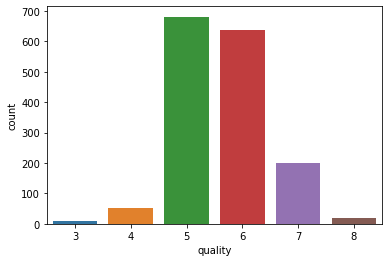

In [6]:
import seaborn as sns 
sns.countplot(df.quality)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


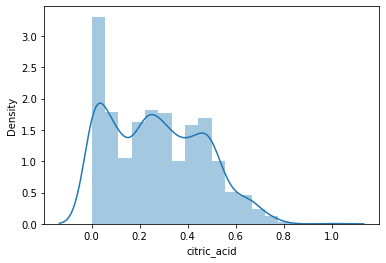

In [7]:
sns.distplot(df.citric_acid)

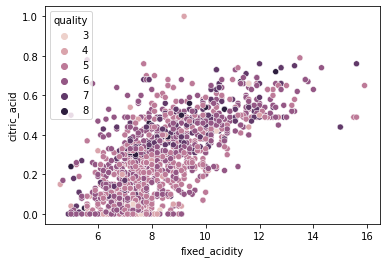

In [8]:
sns.scatterplot(x=df.fixed_acidity,y=df.citric_acid,hue=df.quality)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f54ab926ad0>,
      dtype=object)

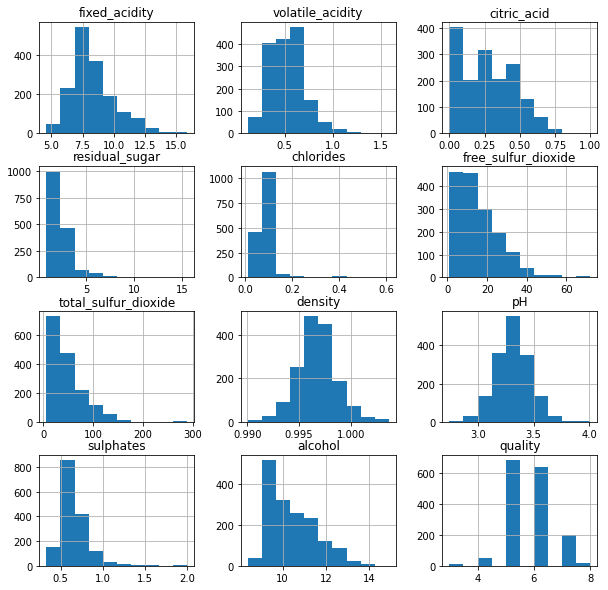

In [9]:
df.hist(figsize=(10,10))

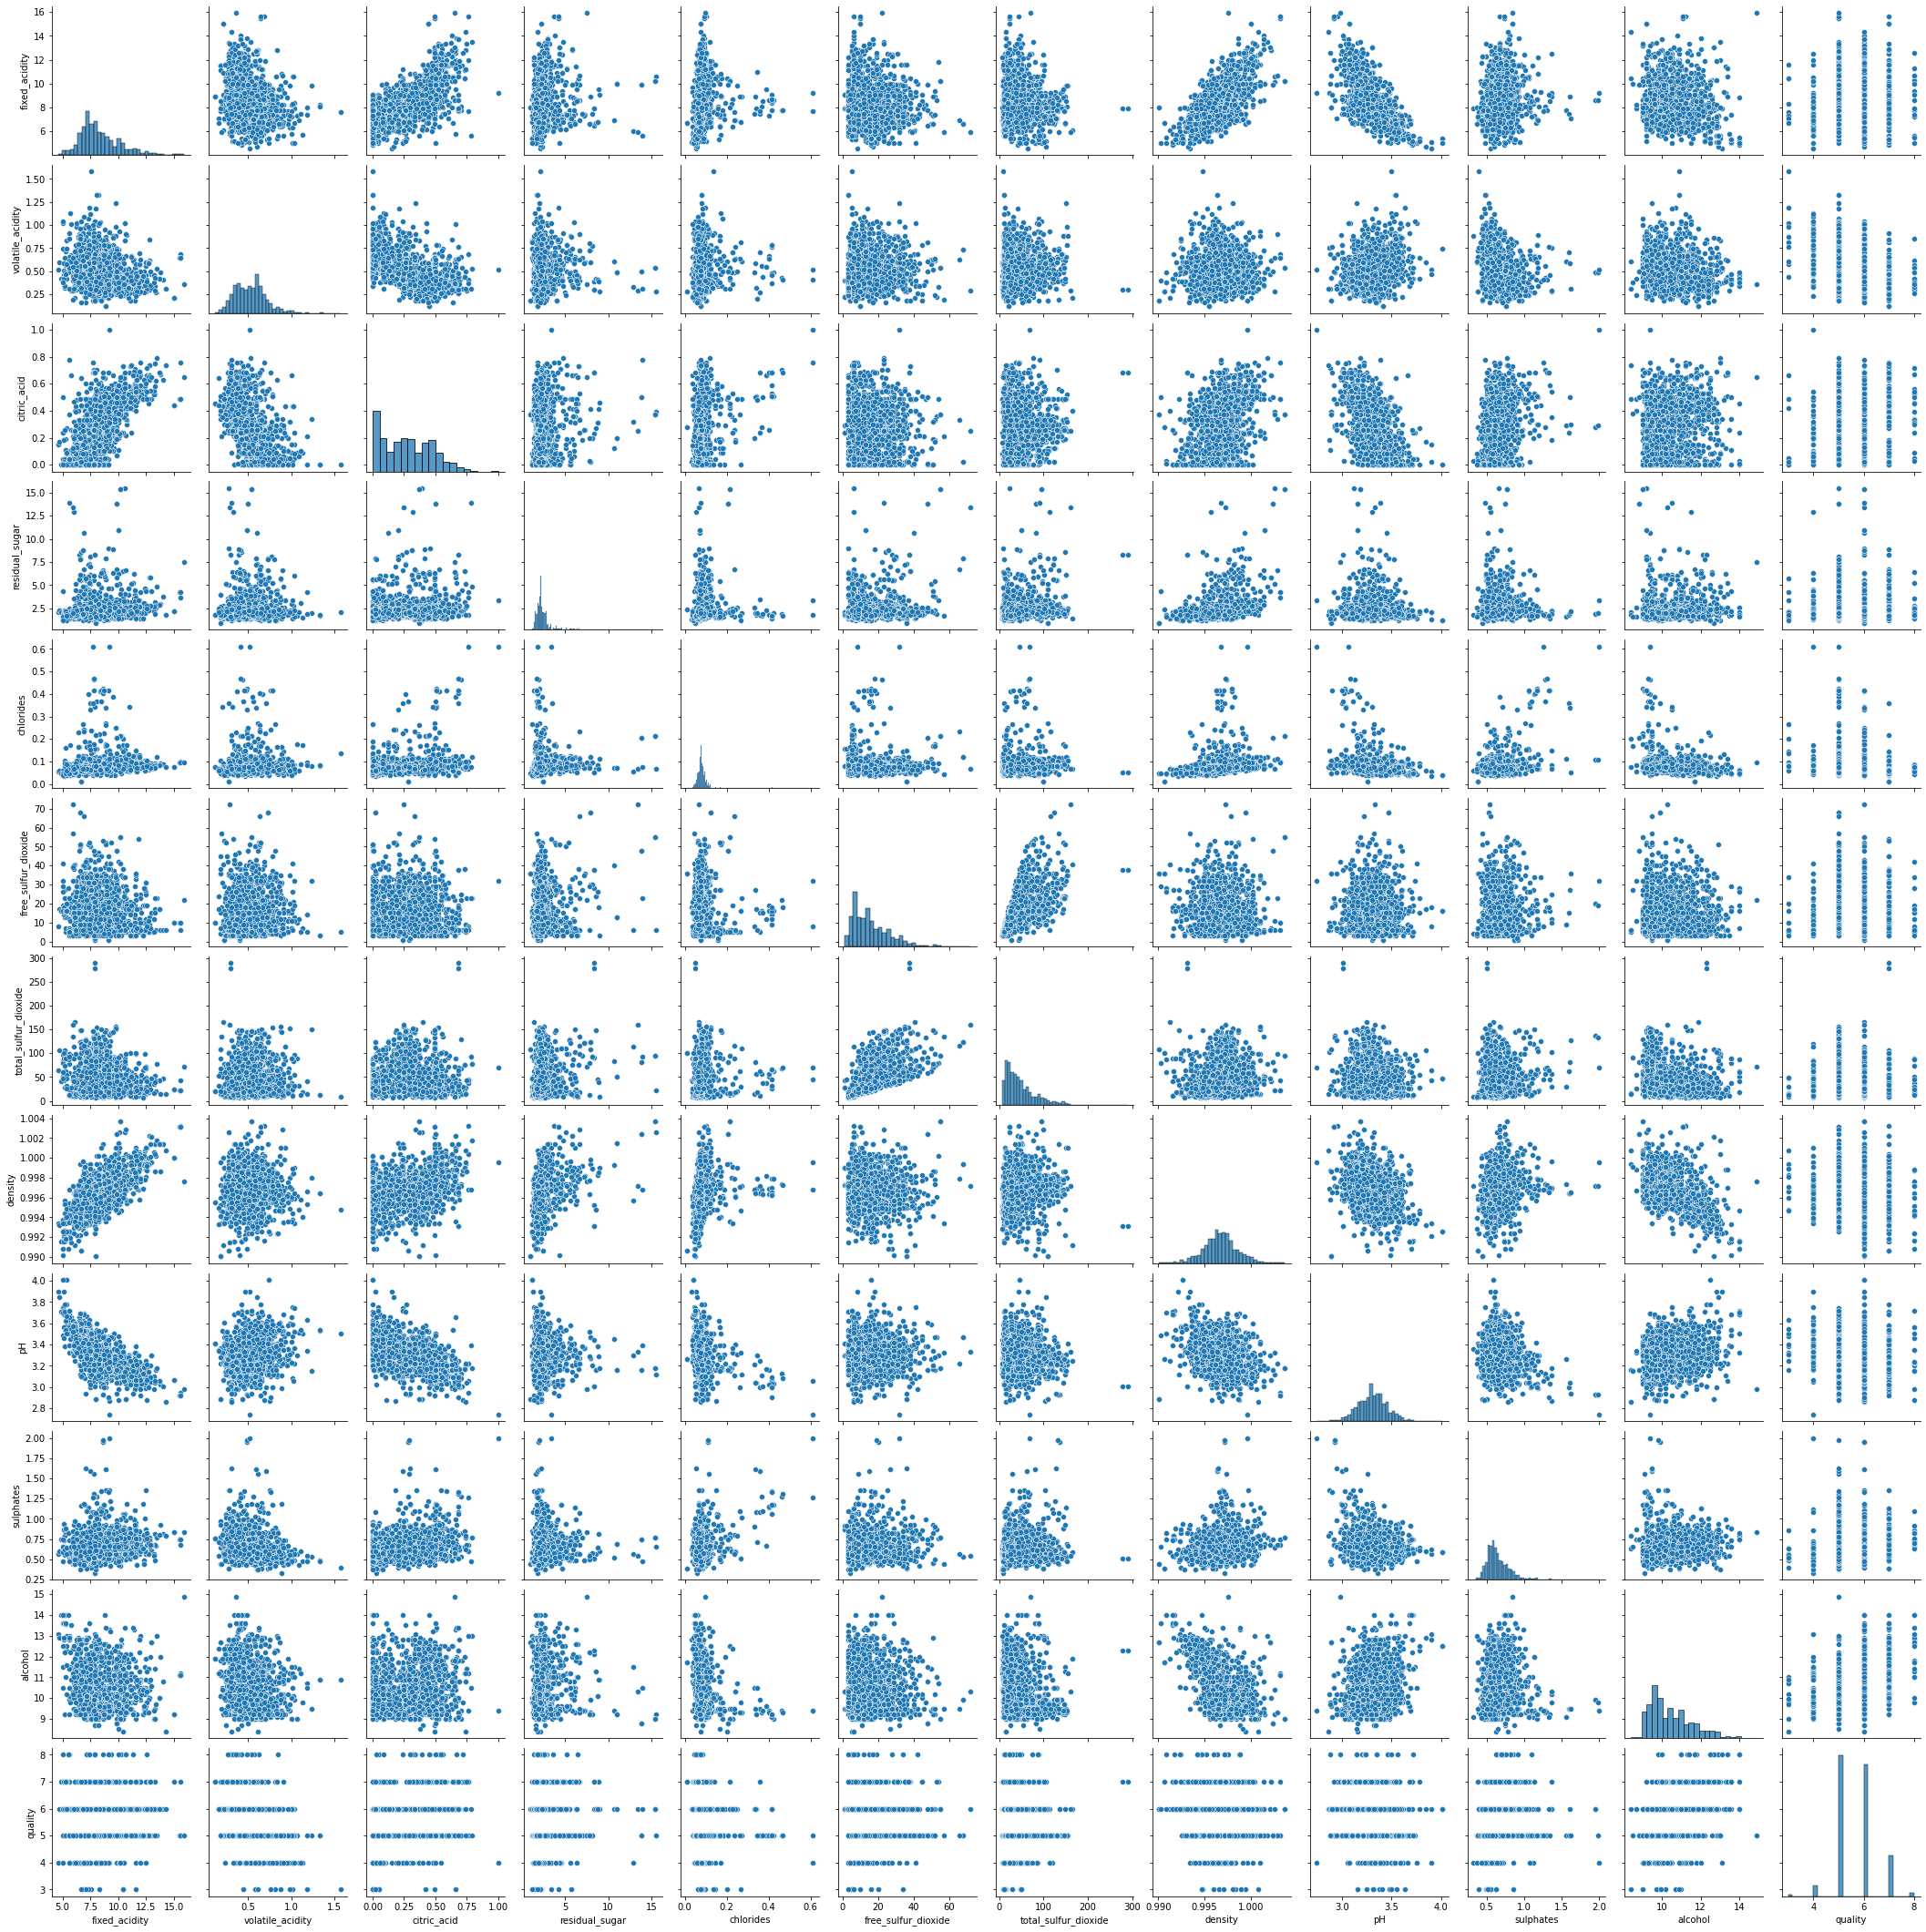

In [10]:
sns.pairplot(df)

<h2> PREPROCESSING </h2>

<h3> Checking missing values </h3>
There are no missing values in dataframe

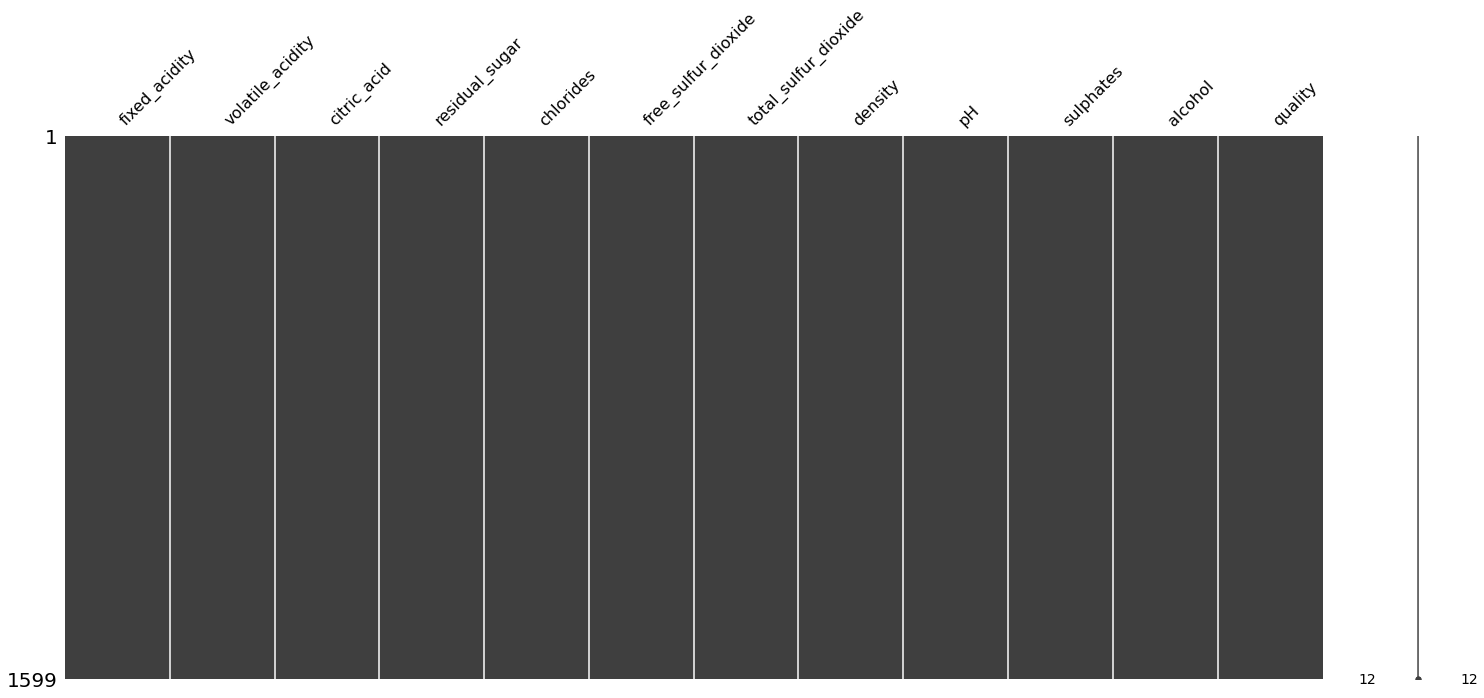

In [11]:
import missingno as msno
msno.matrix(df)

In [12]:
df.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<h3> Checking correlated features </h3>

In [13]:
df.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile_acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric_acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual_sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free_sulfur_dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total_sulfur_dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


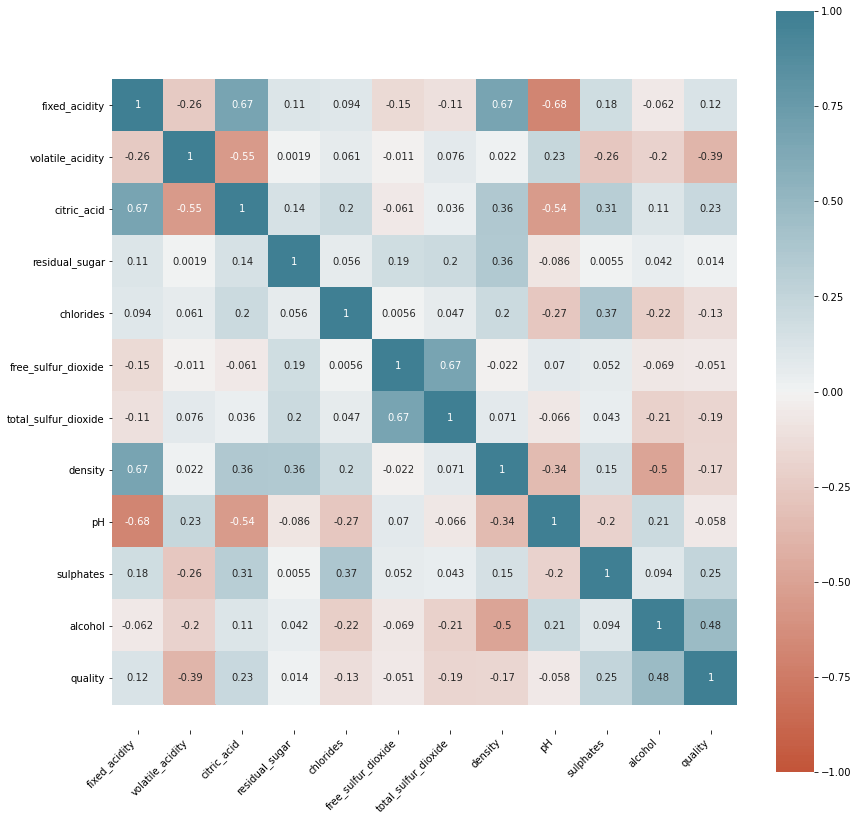

In [14]:
#To see better visualization of correlation
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(14, 14))
ax = sns.heatmap(
    df.corr(), 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_ylim(len(df.corr())+0.5, -0.5);

<h3>Checking imbalance </h3>
There is imbalance problem.

In [15]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<h3> Checking outliers with Isolation Forest </h3>
Since we have imbalance problem, removing outliers dropped one classifier in output. I will not drop outliers.

In [16]:
# Outlier detection
from sklearn.ensemble import IsolationForest
import numpy as np
temp = df.drop("quality", axis=1)

outliers = IsolationForest(random_state=0).fit_predict(temp)
outliers_index = list(np.where(outliers == -1)[0])

del temp
print(f"Outlier Count: {len(outliers_index)} \nSample Count: {len(df)} \nFraction: {round(len(outliers_index)/len(df),3)}")

Outlier Count: 143 
Sample Count: 1599 
Fraction: 0.089


<h3> Checking duplicated values </h3>
There are 240 duplicated values in dataframe. I will drop them.

In [17]:
df.duplicated().sum()

240

In [18]:
df.drop_duplicates(inplace=True)

In [19]:
df.duplicated().sum()

0

<h3>Creating input/output</h3>

In [20]:
X=df.drop("quality", axis=1)
y=df[["quality"]]

<h3> Upsampling </h3>

In [21]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=42)
X_sm,y_sm=sm.fit_resample(X, y)
print(f"Shape of X before SMOTE: {X.shape}\nShape of X after SMOTE: {X_sm.shape}")

Shape of X before SMOTE: (1359, 11)
Shape of X after SMOTE: (3462, 11)


<h3>Dividing dataset into train and test </h3>
Splitting as 0.7 train - 0.3 test ratio

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=123)

<h3>Feature Scaling </h3>

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test) 

<h2> MODEL SELECTION </h2>

<h3> SUPPORT VECTOR MACHINE </h3>

In [24]:
from sklearn import svm 
sv = svm.SVC()
sv.fit(X_train_scaled,y_train)
y_pred_sv = sv.predict(X_test_scaled) 

print("Train Score:",sv.score(X_train_scaled,y_train))
print("Test Score:",sv.score(X_test_scaled,y_test),"\n")

Train Score: 0.7919933966157656
Test Score: 0.7670837343599615 



In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_sv))

              precision    recall  f1-score   support

           3       0.93      0.99      0.96       179
           4       0.77      0.86      0.81       179
           5       0.63      0.52      0.57       164
           6       0.57      0.43      0.49       173
           7       0.74      0.78      0.76       168
           8       0.85      0.99      0.92       176

    accuracy                           0.77      1039
   macro avg       0.75      0.76      0.75      1039
weighted avg       0.75      0.77      0.75      1039



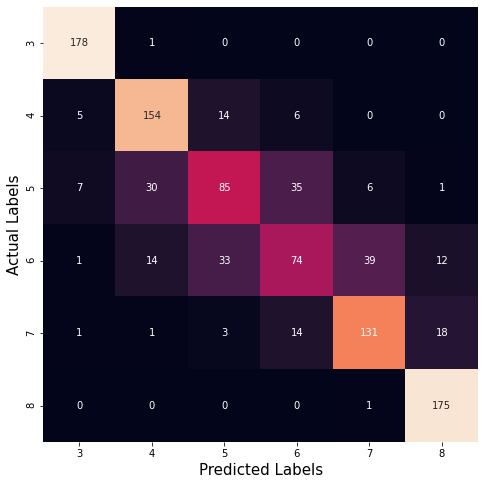

In [26]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
cm = confusion_matrix(y_test,y_pred_sv)
ax =sns.heatmap(cm, square=True, annot=True, cbar=False,fmt='g', xticklabels=[3,4,5,6,7,8], yticklabels=[3,4,5,6,7,8])
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('Actual Labels',fontsize = 15)
plt.show()

<h3> DECISION TREE </h3>

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
param_grid={"max_depth":list(range(3,10)),"max_features":list(range(3,10)),"min_samples_leaf":list(range(3,10)),"criterion":["gini","entropy"]}

dec=GridSearchCV(DecisionTreeClassifier(),param_grid,cv=5,n_jobs = -1)
dec.fit(X_train_scaled,y_train)
y_pred_dec=dec.predict(X_test_scaled)

print("Tuned parameters: ",dec.best_params_)
print("Mean of the cv scores is: ",dec.best_score_)
print("Train Score: ",dec.score(X_train_scaled,y_train))
print("Test Score: ",dec.score(X_test_scaled,y_test))

Tuned parameters:  {'criterion': 'entropy', 'max_depth': 9, 'max_features': 8, 'min_samples_leaf': 3}
Mean of the cv scores is:  0.685118002896822
Train Score:  0.8303755674783326
Test Score:  0.7122232916265641


In [28]:
print(classification_report(y_pred_dec,y_test))

              precision    recall  f1-score   support

           3       0.97      0.86      0.91       201
           4       0.78      0.75      0.77       186
           5       0.48      0.53      0.51       148
           6       0.38      0.54      0.44       120
           7       0.79      0.62      0.69       213
           8       0.86      0.88      0.87       171

    accuracy                           0.71      1039
   macro avg       0.71      0.70      0.70      1039
weighted avg       0.74      0.71      0.72      1039



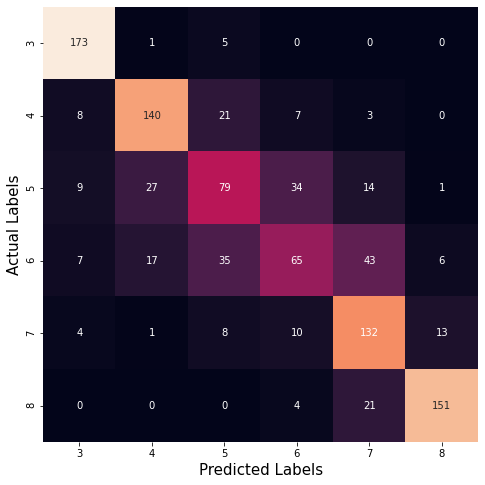

In [29]:
# Confusion Matrix
plt.figure(figsize=(12, 8))
cm = confusion_matrix(y_test,y_pred_dec)
ax =sns.heatmap(cm, square=True, annot=True, cbar=False,fmt='g',xticklabels=[3,4,5,6,7,8], yticklabels=[3,4,5,6,7,8])
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('Actual Labels',fontsize = 15)
plt.show()

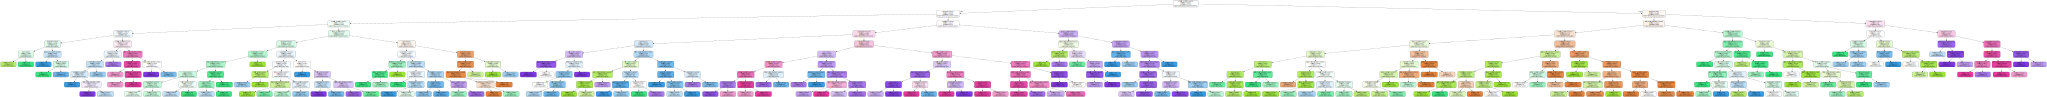

In [35]:
#Visualization
import graphviz
import os
from sklearn.tree import export_graphviz
# We need to locate graphiz directory for visualization
os.environ["PATH"] += ';' + r'C:\Users\yyagm'
dot_data = export_graphviz(dec.best_estimator_, out_file=None,
                     feature_names=X.columns,
                     filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph

<h3> XGBOOST </h3>

In [30]:
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV
params={'max_depth':[3,5,7,9], 'min_child_weight':[3,5,7,9], 'learning_rate':[0.05,0.1,0.5], 'n_estimators':[100,300,500]}

xgb=GridSearchCV(XGBClassifier(objective="multi:softmax"), params, cv=5, n_jobs=-1)
xgb.fit(X_train_scaled,y_train)
y_pred_xgb=xgb.predict(X_test_scaled)

print("\nTuned Parameters: ",xgb.best_params_)
print("Mean cv scores: ",xgb.best_score_)
print("Train Score: ",xgb.score(X_train_scaled,y_train))
print("Test Score: ",xgb.score(X_test_scaled,y_test))


Tuned Parameters:  {'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 500}
Mean cv scores:  0.8056096106330408
Train Score:  0.9909203466776723
Test Score:  0.8248315688161694


In [31]:
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           3       0.96      1.00      0.98       179
           4       0.91      0.93      0.92       179
           5       0.68      0.62      0.65       164
           6       0.61      0.50      0.55       173
           7       0.78      0.89      0.83       168
           8       0.95      0.98      0.96       176

    accuracy                           0.82      1039
   macro avg       0.81      0.82      0.82      1039
weighted avg       0.82      0.82      0.82      1039



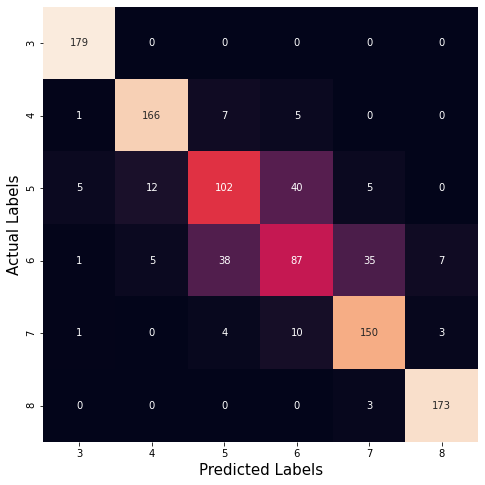

In [32]:
# Confusion Matrix
plt.figure(figsize=(12, 8))
cm = confusion_matrix(y_test,y_pred_xgb)
ax =sns.heatmap(cm, square=True, annot=True, cbar=False,fmt='g',xticklabels=[3,4,5,6,7,8], yticklabels=[3,4,5,6,7,8])
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('Actual Labels',fontsize = 15)
plt.show()

<h2> RESULT </h2>

In [33]:
from sklearn.metrics import precision_score, recall_score, f1_score

train = [sv.score(X_train_scaled,y_train), dec.score(X_train_scaled,y_train), xgb.score(X_train_scaled,y_train)]
test = [sv.score(X_test_scaled,y_test), dec.score(X_test_scaled,y_test), xgb.score(X_test_scaled,y_test)]
precision = [precision_score(y_test, y_pred_sv,average='macro'), precision_score(y_test, y_pred_dec,average='macro'), precision_score(y_test, y_pred_xgb,average='macro')]
recall = [recall_score(y_test, y_pred_sv,average='macro'), recall_score(y_test, y_pred_dec,average='macro'), recall_score(y_test, y_pred_xgb,average='macro') ]
f1 = [f1_score(y_test, y_pred_sv,average='macro'), f1_score(y_test, y_pred_dec,average='macro'), f1_score(y_test, y_pred_xgb,average='macro')]
model = ["Support Vector Machine","Decision Tree","XGBoost"]

In [34]:
scores = pd.DataFrame({"Model Name":model,"Train Score":train,"Test Score":test,"Precision":precision,"Recall":recall,"F1 Score":f1})
scores

,Model Name,Train Score,Test Score,Precision,Recall,F1 Score
0,Support Vector Machine,0.791993,0.767084,0.748331,0.762478,0.751085
1,Decision Tree,0.830376,0.712223,0.698599,0.708284,0.698496
2,XGBoost,0.990920,0.824832,0.812509,0.821338,0.815014


XGBoost performs better.